# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np

import re
import string

#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
#import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report




In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

# Basic EDA on cnbc_headlines dataset

In [4]:
# Read csv file of cnbc headlines using pandas

cnbc_headlines = pd.read_csv("/content/cnbc_headlines.csv")

In [5]:
cnbc_headlines.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [6]:
# check the shape of cnbc headline dataset
cnbc_headlines.shape

(3080, 3)

In [7]:
# Check all the columns in the cnbc headline dataset
cnbc_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [8]:
# Check which columns are having categorical, numerical or boolean values
cnbc_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [9]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc_headlines.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [10]:
 # drop nan values in cnbc headline dataset

cnbc_headlines = cnbc_headlines.dropna()

In [11]:
cnbc_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [12]:
# drop the duplicate rows in the dataset keep the first one
cnbc_headlines =cnbc_headlines.drop_duplicates(subset = ['Headlines', 'Description'] , keep = 'first')

cnbc_headlines.reset_index(drop = True , inplace = True)

cnbc_headlines


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [13]:
# check the shape of cnbc headline dataset
cnbc_headlines.shape

(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [14]:
# Read csv file of gaurdian headlines using pandas
gaurdian_headlines = pd.read_csv('/content/guardian_headlines.csv')

In [15]:
gaurdian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [16]:
#check the shape of gaurdian headline dataset
gaurdian_headlines.shape

(17800, 2)

In [17]:
#check columns of gaurdian headline
gaurdian_headlines.columns

Index(['Time', 'Headlines'], dtype='object')

In [18]:
# Check which columns are having categorical, numerical or boolean values
gaurdian_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [19]:
# check null values in gaurdian headlines dataset
gaurdian_headlines.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [20]:
# drop duplicate rows in headlines and keep the first one
gaurdian_headlines = gaurdian_headlines.drop_duplicates(['Headlines'], keep = 'first')

gaurdian_headlines.reset_index(drop = True , inplace = True)

gaurdian_headlines

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17790,17-Dec-17,How investing in solar energy can create a bri...
17791,17-Dec-17,Poundland suppliers hit by insurance downgrade
17792,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17793,17-Dec-17,Unilever sells household name spreads to KKR f...


# Basic EDA on reuters headlines

In [21]:
# Read csv file of reuters headlines using using pandas
reuters_headlines = pd.read_csv('/content/reuters_headlines.csv')

In [22]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [23]:
#check the shape of reuters headlines dataset
reuters_headlines.shape

(32770, 3)

In [24]:
#check the columns of reuters headline dataset
reuters_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [25]:
# Check which columns are having categorical, numerical or boolean values
reuters_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [26]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [27]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_headlines = reuters_headlines.drop_duplicates(['Headlines','Description'] , keep = 'first' )

reuters_headlines.reset_index(drop = True , inplace = True)
reuters_headlines

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#Making some functions that we will need  ahead

Preprocessing

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [28]:
# create a function for preprocessing
def preprocessing_text(text):

  #convert all to lowercase
  text = text.lower()


  #remove puntuations
  text = text.translate(str.maketrans('','',string.punctuation))


  #remove stopword
  stopword = set(stopwords.words('english'))
  texttoken = word_tokenize(text)
  filterword = [word for word in texttoken if word not in stopword]


  #stemming
  ps = PorterStemmer()
  stemword = [ps.stem(word) for word in filterword]



  #lemmitizing
  lemmatizer = WordNetLemmatizer()
  lemmawords = [lemmatizer.lemmatize(word , pos='a') for word in stemword]

  return " ".join(lemmawords)





SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [29]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# create sentiment intensity analyzer object
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [30]:
#fuction to  decide sentiment as positive, negative and neutral
def get_analysis(score):
  if score < 0.0:
    return 'Negative'
  elif score == 0.0:
    return 'Neutral'
  else:
    return 'Positive'

# Now working with description on datasets

In [31]:
# concatenate cnbc headlines dataset and reuters headline dataset
new_data = pd.concat([cnbc_headlines, reuters_headlines], axis = 0)

In [32]:
#check the shape of this new dataset
new_data.shape

(35463, 3)

In [33]:
#make a copy of new dataset
new_data_copy = new_data.copy()

In [34]:
# apply preprocessing to the description of new dataset

new_data['Description'] = new_data['Description'].apply(preprocessing_text)

new_data.head(20 )

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...


In [35]:
new_data['Description'].values

array(['mad money host jim cramer recommend buy four compani support vaccin develop',
       'mad money host jim cramer ring lightn round bell mean he give answer caller stock question rapid speed',
       'well pay earn noncovid compani lancet publish good news astrazeneca vaccin trial cramer said',
       ...,
       'mcdonald corp tuesday announc approv scienc base target cut greenhous ga emiss battl climat chang say first restaur compani',
       'pratt whitney soon begin deliveri spare engin india indigo airlin forc ground eight airbu a320neo aircraft last week engin problem sourc familiar matter told reuter',
       'britain consid suggest give bodi charg uphold data privaci law power prime minist theresa may spokesman said tuesday respond concern whether facebook adequ protect user data'],
      dtype=object)

In [36]:
# analyze polarity score of values in description and  add new column of it in dataset

ds_score = []
for value in new_data['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])

new_data['ds_score'] = ds_score
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [37]:
# apply the function  which decides sentiment to  polarity score column
new_data['ds_score'] = new_data['ds_score'].apply(get_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


<Axes: xlabel='ds_score', ylabel='count'>

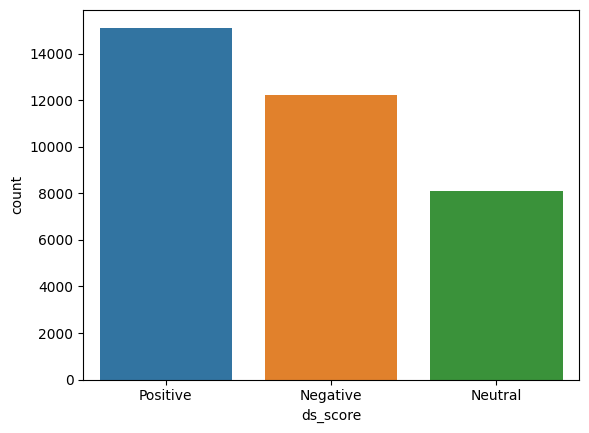

In [38]:
# plot a count plot on description score column

import seaborn as sns
sns.countplot(data = new_data , x= 'ds_score')

In the description

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [39]:
# pie chart on description score column


import plotly.express as px
fig = px.pie(new_data , names= 'ds_score' , title = 'Pie chart of different sentiments')
fig.show()

In the dataset

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description

In [40]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212
X_train_ds , X_test_ds , y_train_ds , y_test_ds = train_test_split(new_data.Description , new_data.ds_score , test_size= 0.1 , random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [41]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf' , TfidfVectorizer()),
                 ('model' ,LinearSVC()) ])


# Fit the pipeline to the data
linear_svc_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = linear_svc_model_ds.predict(X_test_ds)
print('Model  -  LINEAR SVC')
# print accuracy score
accuracy_lsvc = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

Model  -  LINEAR SVC
accuracy score : 93.43
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

CPU times: user 1.82 s, sys: 29.9 ms, total: 1.85 s
Wall time: 1.91 s


LOGISTIC REGRESSION


In [42]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,LogisticRegression()) ])


# Fit the pipeline to the data
log_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = log_model_ds.predict(X_test_ds)
print('Model  -  Logistic Regression')
# print accuracy score
accuracy_log = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model  -  Logistic Regression
accuracy score : 89.51
[[1047   93   84]
 [  44  740   32]
 [  68   51 1388]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.90      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.90      0.90      3547

CPU times: user 4.89 s, sys: 4.43 s, total: 9.32 s
Wall time: 7.02 s


MULTINOMIAL NAIVE BAYES


In [43]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,MultinomialNB()) ])


# Fit the pipeline to the data
MultinomialNB_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = MultinomialNB_model_ds.predict(X_test_ds)
print('Model  -  Multinomial Naive Bayes')
# print accuracy score
accuracy_MNB = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

Model  -  Multinomial Naive Bayes
accuracy score : 62.31
[[ 729    8  487]
 [ 155   98  563]
 [ 117    7 1383]]
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    Positive       0.57      0.92      0.70      1507

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547

CPU times: user 1.67 s, sys: 10.6 ms, total: 1.68 s
Wall time: 1.72 s


BERNOULLI NAIVE BAYES


In [44]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB


pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,BernoulliNB()) ])


# Fit the pipeline to the data
BernoulliNB_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = BernoulliNB_model_ds.predict(X_test_ds)
print('Model  -  Bernoullis Naive Bayes')
# print accuracy score
accuracy_BNB = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

Model  -  Bernoullis Naive Bayes
accuracy score : 73.61
[[ 879   70  275]
 [ 127  496  193]
 [ 198   73 1236]]
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1224
     Neutral       0.78      0.61      0.68       816
    Positive       0.73      0.82      0.77      1507

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547

CPU times: user 1.01 s, sys: 7.85 ms, total: 1.01 s
Wall time: 1.02 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [45]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,GradientBoostingClassifier(loss = 'deviance',
                                                      learning_rate=0.01,
                                                      n_estimators = 10,
                                                      max_depth = 5 ,
                                                      random_state = 55)) ])


# Fit the pipeline to the data
GBC_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = GBC_model_ds.predict(X_test_ds)
print('Model  -  Gradient Boosting Classifier')
# print accuracy score
accuracy_GBC = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



Model  -  Gradient Boosting Classifier
accuracy score : 42.68
[[   9    0 1215]
 [   0    0  816]
 [   2    0 1505]]
              precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547

CPU times: user 16.8 s, sys: 7.66 ms, total: 16.8 s
Wall time: 16.9 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [46]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,XGBClassifier(loss = 'deviance',
                                                      learning_rate=0.01,
                                                      n_estimators = 10,
                                                      max_depth = 5 ,
                                                      random_state = 55)) ])


# Fit the pipeline to the data
XGB_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = XGB_model_ds.predict(X_test_ds)
print('Model  -  XGBoost')
# print accuracy score
accuracy_XGB = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

ValueError: ignored

DECISION TREE CLASSIFICATION MODEL


In [47]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,DecisionTreeClassifier(criterion = 'entropy',
                                                  max_depth =10,
                                                  splitter = 'best',
                                                  random_state = 2020)) ])


# Fit the pipeline to the data
DTC_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = DTC_model_ds.predict(X_test_ds)
print('Model  -  Decision tree classifier')
# print accuracy score
accuracy_DTC = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

Model  -  Decision tree classifier
accuracy score : 51.2
[[1088    1  135]
 [ 809    0    7]
 [ 779    0  728]]
              precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

CPU times: user 2.64 s, sys: 5.84 ms, total: 2.64 s
Wall time: 2.65 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [48]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,KNeighborsClassifier(n_neighbors = 10, weights = 'distance', algorithm ='brute' )) ])


# Fit the pipeline to the data
KNN_model_ds = pipe.fit(X_train_ds , y_train_ds)
# predict on test dataset
prediction = KNN_model_ds.predict(X_test_ds)
print('Model  -  KNN classifier')
# print accuracy score
accuracy_KNN = print('accuracy score : {}'.format(round(accuracy_score(y_test_ds,prediction)*100,2)))
#print confusion matrix
print(confusion_matrix(y_test_ds,prediction))
#print classification report
print(classification_report(y_test_ds,prediction))

Model  -  KNN classifier
accuracy score : 57.26
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
    Positive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 2min 3s, sys: 96.9 ms, total: 2min 3s
Wall time: 1min 12s


In [49]:
# helper function for comparing models matric
def compare_models(models ,names , X_train_ds ,y_train_ds ,X_test_ds, y_test_ds ):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for (model , name) in zip(models, names):
      print(name)
      y_pred = model.predict(X_test_ds)
      res = classification_report(y_test_ds , y_pred)
      print("Classification Report \n",res)
      print("-----------------------------------------------------------------------------")

    # then predict on the test set


In [51]:
# list of model objects
models = [linear_svc_model_ds ,log_model_ds, MultinomialNB_model_ds,BernoulliNB_model_ds,GBC_model_ds , DTC_model_ds,KNN_model_ds]
# list of model names
names = ['linearSVC','logisitc','MultinomialNB','BernoulliNB','gradientboost','Decision Tree','KNN']
# print the comparison of models
compare_models(models ,names , X_train_ds ,y_train_ds ,X_test_ds, y_test_ds )

linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

-----------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.90      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.90      0.90      3547

-----------------------------------------------------------------------------
MultinomialNB
C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547

-----------------------------------------------------------------------------
Decision Tree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

-----------------------------------------------------------------------------
KNN
Classification R

# working with test dataset

In [52]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model_ds.predict(X_test_ds)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [53]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)

In [54]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# Now working with headlines + description

In [55]:
# merge headlines and description of new dataset and name it info
new_data['info'] =new_data['Headlines'] + new_data['Description']
new_data.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [56]:
# only keep info and time column . drop all remaining columns
new_data = new_data.drop(columns = ['Headlines', 'Description','ds_score'])
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [57]:
# apply preprocessing on info column
new_data['info'] = new_data['info'].apply(preprocessing_text)
new_data.head(20)

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
5,"7:23 PM ET Thu, 16 July 2020",cramer lightn round would stay long wexmad mon...
6,"8:03 PM ET Thu, 16 July 2020",acorn ceo parent turn 5 five figur kid power c...
7,"8:54 AM ET Thu, 16 July 2020",dividend cut may mean rethink retir incom stra...
8,"8:25 PM ET Wed, 15 July 2020",stockx authent 1 million jordan sneaker year c...
9,"7:51 PM ET Wed, 15 July 2020",biohaven pharmaceut land khloe kardashian infl...


In [71]:
new_data['info'].values

array(['jim cramer good way invest covid19 vaccin gold rushmad money host jim cramer recommend buy four compani support vaccin develop',
       'cramer lightn round would teradynemad money host jim cramer ring lightn round bell mean give answer caller stock question rapid speed',
       'cramer week ahead big week earn even big week vaccineswel pay earn noncovid compani lancet publish good news astrazeneca vaccin trial cramer said',
       ...,
       'mcdonald set greenhous ga reduct targetsmcdonald corp tuesday announc approv scienc base target cut greenhou ga emiss battl climat chang say first restaur compani',
       'pratt whitney deliv spare a320neo engin soon india indigo sourcepratt whitney soon begin deliveri spare engin india indigo airlin forc ground eight airbu a320neo aircraft last week engin problem sourc familiar matter told reuter',
       'uk alway consid way improv data law pm may spokesmanbritain consid suggest give bodi charg uphold data privaci law power prime mini

In [58]:
# analyze polarity score of values in info and  add new column of it in dataset

info_score = []

for value in new_data['info'].values:
  info_score.append(analyzer.polarity_scores(value)['compound'])

new_data['info_score'] = info_score
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [59]:
# apply the function  which decides sentiment to  polarity score column

new_data['info_score'] = new_data['info_score'].apply(get_analysis)
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


<Axes: xlabel='info_score', ylabel='count'>

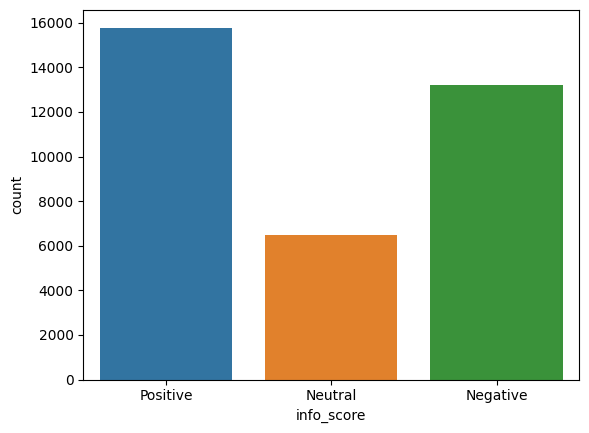

In [60]:
# perform count plot on info_score column
sns.countplot(data = new_data , x= 'info_score')

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [61]:
# perform pie chart on info_score column
fig = px.pie(new_data , names= 'info_score' , title = 'Pie chart of different sentiments')
fig.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [62]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212
X_train_hl_ds , X_test_hl_ds , y_train_hl_ds , y_test_hl_ds = train_test_split(new_data['info'],new_data.info_score , test_size = 0.1 , random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [64]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# Fit the pipline to the data
linear_svc_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = linear_svc_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - LINEAR SVC")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))

MODEL - LINEAR SVC
accuracy score :90.7
[[1183   57   83]
 [  45  565   48]
 [  55   42 1469]]
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

CPU times: user 2.43 s, sys: 5.79 ms, total: 2.44 s
Wall time: 2.49 s


LOGISTIC REGRESSION


In [67]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fit the pipline to the data
log_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = log_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - LOGISTIC REGRESSION")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy score :86.83
[[1140   68  115]
 [  82  494   82]
 [  81   39 1446]]
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      1323
     Neutral       0.82      0.75      0.78       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547

CPU times: user 9.39 s, sys: 8.42 s, total: 17.8 s
Wall time: 13.5 s


MULTINOMIAL NAIVE BAYES


In [68]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fit the pipline to the data
MultinomialNB_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = MultinomialNB_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - MULTINOMIALNB")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))

MODEL - MULTINOMIALNB
accuracy score :62.9
[[ 780    1  542]
 [ 145    9  504]
 [ 122    2 1442]]
              precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1323
     Neutral       0.75      0.01      0.03       658
    Positive       0.58      0.92      0.71      1566

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547

CPU times: user 1.36 s, sys: 4.81 ms, total: 1.36 s
Wall time: 1.37 s


BERNOULLI NAIVE BAYES


In [69]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

# Fit the pipline to the data
BernoulliNB_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = BernoulliNB_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - BernoulliNB")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))

MODEL - BernoulliNB
accuracy score :68.54
[[ 947   13  363]
 [ 173  154  331]
 [ 217   19 1330]]
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1323
     Neutral       0.83      0.23      0.36       658
    Positive       0.66      0.85      0.74      1566

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547

CPU times: user 3.51 s, sys: 30.3 ms, total: 3.54 s
Wall time: 4.88 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [73]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss='deviance',
                                                      learning_rate = 0.01,
                                                      n_estimators = 10,
                                                      max_depth = 5,
                                                      random_state = 55))])

# Fit the pipline to the data
GB_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = GB_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - Gradient Boosting")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



MODEL - Gradient Boosting
accuracy score :44.4
[[  11    0 1312]
 [   0    0  658]
 [   2    0 1564]]
              precision    recall  f1-score   support

    Negative       0.85      0.01      0.02      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.51      0.44      0.28      3547

CPU times: user 28.8 s, sys: 49.9 ms, total: 28.9 s
Wall time: 32.3 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [74]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss='deviance',
                                                      learning_rate = 0.01,
                                                      n_estimators = 10,
                                                      max_depth = 5,
                                                      random_state = 55))])

# Fit the pipline to the data
XGB_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = XGB_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - XGBoost")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))


ValueError: ignored

DECISION TREE CLASSIFICATION MODEL


In [75]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, splitter = 'best',random_state = 2020))])

# Fit the pipline to the data
DTC_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = DTC_model_hl_ds.predict(X_test_hl_ds)
print("MODEL -Decision tree classifier ")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))

MODEL -Decision tree classifier 
accuracy score :53.23
[[1174    2  147]
 [ 653    0    5]
 [ 850    2  714]]
              precision    recall  f1-score   support

    Negative       0.44      0.89      0.59      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.82      0.46      0.59      1566

    accuracy                           0.53      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.53      0.53      0.48      3547

CPU times: user 4.78 s, sys: 16.3 ms, total: 4.79 s
Wall time: 5.91 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [76]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10 , weights = 'distance' , algorithm = 'brute'))])

# Fit the pipline to the data
KNN_model_hl_ds = pipe.fit(X_train_hl_ds , y_train_hl_ds)
#predict on test dataset
prediction = KNN_model_hl_ds.predict(X_test_hl_ds)
print("MODEL - K Nearest Neighbors ")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(y_test_hl_ds,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds,prediction))
# print classification report
print(classification_report(y_test_hl_ds,prediction))

MODEL - K Nearest Neighbors 
accuracy score :57.01
[[ 757   86  480]
 [ 191  159  308]
 [ 336  124 1106]]
              precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1323
     Neutral       0.43      0.24      0.31       658
    Positive       0.58      0.71      0.64      1566

    accuracy                           0.57      3547
   macro avg       0.53      0.51      0.51      3547
weighted avg       0.56      0.57      0.56      3547

CPU times: user 2min 38s, sys: 136 ms, total: 2min 38s
Wall time: 1min 42s


In [77]:
def compare_models(models ,names , X_train_hl_ds ,y_train_hl_ds ,X_test_hl_ds, y_test_hl_ds ):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for (model , name) in zip(models, names):
      print(name)
      y_pred = model.predict(X_test_hl_ds)
      res = classification_report(y_test_hl_ds , y_pred)
      print("Classification Report \n",res)
      print("-----------------------------------------------------------------------------")


In [78]:
# list of model objects
models = [linear_svc_model_hl_ds ,log_model_hl_ds, MultinomialNB_model_hl_ds,BernoulliNB_model_hl_ds,GB_model_hl_ds , DTC_model_hl_ds,KNN_model_hl_ds]
# list of model names
names = ['linearSVC','logisitc','MultinomialNB','BernoulliNB','gradientboost','Decision Tree','KNN']
# print the comparison of models
compare_models(models ,names , X_train_ds ,y_train_ds ,X_test_ds, y_test_ds )

linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.89      0.91      0.90      1224
     Neutral       0.90      0.83      0.86       816
    Positive       0.91      0.94      0.93      1507

    accuracy                           0.90      3547
   macro avg       0.90      0.89      0.90      3547
weighted avg       0.90      0.90      0.90      3547

-----------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      1224
     Neutral       0.86      0.73      0.79       816
    Positive       0.87      0.93      0.90      1507

    accuracy                           0.86      3547
   macro avg       0.86      0.84      0.85      3547
weighted avg       0.86      0.86      0.86      3547

-----------------------------------------------------------------------------
MultinomialNB
C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.88      0.01      0.02      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.48      0.43      0.26      3547

-----------------------------------------------------------------------------
Decision Tree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.40      0.90      0.55      1224
     Neutral       0.50      0.00      0.00       816
    Positive       0.84      0.44      0.58      1507

    accuracy                           0.50      3547
   macro avg       0.58      0.45      0.38      3547
weighted avg       0.61      0.50      0.44      3547

-----------------------------------------------------------------------------
KNN
Classification R

# working with test data

In [79]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model_hl_ds.predict(X_test_hl_ds)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [80]:
# creating a dataframe of predicted results
prediction= pd.DataFrame(y_predicted)

In [81]:
prediction.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# now working on headlines

In [83]:
new_data_copy.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [86]:
# from the dataset you have copied before delete the column of description
new_data_copy = new_data_copy.drop(['Description'],axis =1)
new_data_copy.head()

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [87]:
gaurdian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [88]:
# remane the date column in gaurdian headlines dataset  to time
gaurdian_headlines= gaurdian_headlines.rename(columns = {'Date':'Time'})
gaurdian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [90]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
all_headlines = pd.concat([gaurdian_headlines , new_data_copy] , axis = 0)

In [92]:
all_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [94]:
# check the shape of all headlines dataset
all_headlines.shape

(53258, 2)

In [95]:
#apply preprocessin to the headlines column in the new dataset
all_headlines['Headlines']= all_headlines['Headlines'].apply(preprocessing_text)
all_headlines.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...


In [98]:
# analyze polarity score of values in headlines and  add new column of it in dataset

hl_score = []

for value in all_headlines['Headlines'].values:
  hl_score.append(analyzer.polarity_scores(value)['compound'])

all_headlines['hl_score'] = hl_score
all_headlines


,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [99]:
# apply the function  which decides sentiment to  polarity score column

all_headlines['hl_score'] = all_headlines['hl_score'].apply(get_analysis)

all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


<Axes: xlabel='hl_score', ylabel='count'>

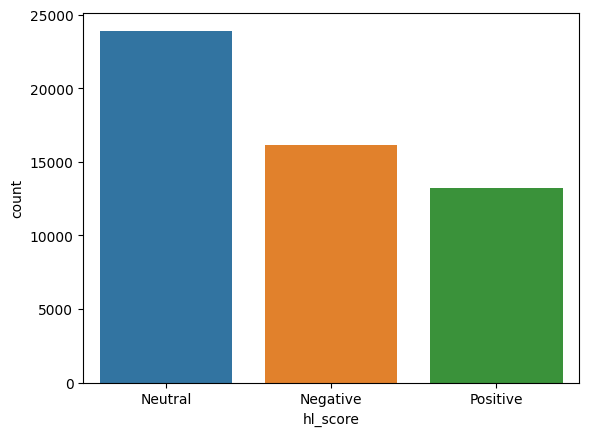

In [101]:
#perform countplot on headline score column

sns.countplot(data = all_headlines , x= 'hl_score')

In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [102]:
#perform pie digram on headline score column

fig = px.pie(all_headlines  , names = 'hl_score' , title= 'Pie chart of different sentiments')
fig.show()

In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [103]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212

train_X_hl , test_X_hl , train_y_hl , test_y_hl = train_test_split(all_headlines['Headlines'],all_headlines.hl_score , test_size = 0.1 , random_state = 212)


LINEAR SUPPORT VECTOR MACHINE

In [104]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# Fit the pipline to the data
linear_svc_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = linear_svc_model_hl.predict(test_X_hl)
print("MODEL - LINEAR SVC")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))

MODEL - LINEAR SVC
accuracy score :97.45
[[1572   37   40]
 [   2 2321    3]
 [  41   13 1297]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

CPU times: user 2.09 s, sys: 7.94 ms, total: 2.1 s
Wall time: 2.14 s


LOGISTIC REGRESSION

In [105]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])


# Fit the pipline to the data
log_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = log_model_hl.predict(test_X_hl)
print("MODEL - LOGISTIC REGRESSION")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy score :94.18
[[1479  118   52]
 [   3 2321    2]
 [  58   77 1216]]
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

CPU times: user 4.65 s, sys: 4.34 s, total: 8.99 s
Wall time: 5.42 s


MULTINOMIAL NAIVE BAYES


In [106]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])


# Fit the pipline to the data
MultinomialNB_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = MultinomialNB_model_hl.predict(test_X_hl)
print("MODEL - Multinomail Naive Bayes")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))

MODEL - Multinomail Naive Bayes
accuracy score :84.28
[[1367  208   74]
 [  51 2251   24]
 [ 200  280  871]]
              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      1649
     Neutral       0.82      0.97      0.89      2326
    Positive       0.90      0.64      0.75      1351

    accuracy                           0.84      5326
   macro avg       0.86      0.81      0.83      5326
weighted avg       0.85      0.84      0.84      5326

CPU times: user 852 ms, sys: 2.98 ms, total: 855 ms
Wall time: 856 ms


BERNOULLI NAIVE BAYES


In [107]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])


# Fit the pipline to the data
BernoulliNB_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = BernoulliNB_model_hl.predict(test_X_hl)
print("MODEL - Bernoulli NB")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))


MODEL - Bernoulli NB
accuracy score :88.96
[[1451   66  132]
 [ 106 2146   74]
 [ 163   47 1141]]
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      1649
     Neutral       0.95      0.92      0.94      2326
    Positive       0.85      0.84      0.85      1351

    accuracy                           0.89      5326
   macro avg       0.88      0.88      0.88      5326
weighted avg       0.89      0.89      0.89      5326

CPU times: user 1.55 s, sys: 3.51 ms, total: 1.55 s
Wall time: 3.33 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [109]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,GradientBoostingClassifier(loss = 'deviance',
                                                      learning_rate=0.01,
                                                      n_estimators = 10,
                                                      max_depth = 5 ,
                                                      random_state = 55)) ])

# Fit the pipline to the data
GB_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = GB_model_hl.predict(test_X_hl)
print("MODEL - Gardient Boost")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



MODEL - Gardient Boost
accuracy score :43.67
[[   0 1649    0]
 [   0 2326    0]
 [   0 1351    0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

CPU times: user 12.3 s, sys: 9.96 ms, total: 12.3 s
Wall time: 14.7 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [110]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([('vect' , CountVectorizer()),
                 ('tfidf' , TfidfTransformer()),
                 ('model' ,XGBClassifier(loss = 'deviance',
                                                      learning_rate=0.01,
                                                      n_estimators = 10,
                                                      max_depth = 5 ,
                                                      random_state = 55)) ])

# Fit the pipline to the data
XGB_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = XGB_model_hl.predict(test_X_hl)
print("MODEL - XGB")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))

ValueError: ignored

DECISION TREE CLASSIFICATION MODEL


In [111]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, splitter = 'best',random_state = 2020))])

# Fit the pipline to the data
DTC_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = DTC_model_hl.predict(test_X_hl)
print("MODEL - DTC")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))

MODEL - DTC
accuracy score :59.14
[[ 417 1175   57]
 [   0 2324    2]
 [  31  911  409]]
              precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.59      5326
   macro avg       0.78      0.52      0.51      5326
weighted avg       0.74      0.59      0.54      5326

CPU times: user 2.63 s, sys: 6.82 ms, total: 2.64 s
Wall time: 2.68 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [112]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10 , weights = 'distance' , algorithm = 'brute'))])

# Fit the pipline to the data
KNN_model_hl = pipe.fit(train_X_hl , train_y_hl)
#predict on test dataset
prediction = KNN_model_hl.predict(test_X_hl)
print("MODEL - KNN")

#print accuracy
print('accuracy score :{}'.format(round(accuracy_score(test_y_hl,prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl,prediction))
# print classification report
print(classification_report(test_y_hl,prediction))

MODEL - KNN
accuracy score :65.38
[[ 918  589  142]
 [ 248 1925  153]
 [ 160  552  639]]
              precision    recall  f1-score   support

    Negative       0.69      0.56      0.62      1649
     Neutral       0.63      0.83      0.71      2326
    Positive       0.68      0.47      0.56      1351

    accuracy                           0.65      5326
   macro avg       0.67      0.62      0.63      5326
weighted avg       0.66      0.65      0.64      5326

CPU times: user 54.4 s, sys: 55.6 ms, total: 54.4 s
Wall time: 36 s


In [113]:
# helper function for comparing models matric
def compare_models(models ,names , train_X_hl ,train_y_hl ,test_X_hl,test_y_hl ):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for (model , name) in zip(models, names):
      print(name)
      y_pred = model.predict(test_X_hl)
      res = classification_report(test_y_hl , y_pred)
      print("Classification Report \n",res)
      print("-----------------------------------------------------------------------------")


In [114]:
# list of model objects

# list of model objects
models = [linear_svc_model_hl ,log_model_hl, MultinomialNB_model_hl,BernoulliNB_model_hl,GB_model_hl , DTC_model_hl,KNN_model_hl]
# list of model names
names = ['linearSVC','logisitc','MultinomialNB','BernoulliNB','gradientboost','Decision Tree','KNN']
# print the comparison of models
compare_models(models ,names , train_X_hl ,train_y_hl ,test_X_hl,test_y_hl )

linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

-----------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

-----------------------------------------------------------------------------
MultinomialNB
C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

-----------------------------------------------------------------------------
Decision Tree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.59      5326
   macro avg       0.78      0.52      0.51      5326
weighted avg       0.74      0.59      0.54      5326

-----------------------------------------------------------------------------
KNN
Classification R

# now working with test data

In [116]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model_hl.predict(test_X_hl)
y_predicted

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [117]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)

In [118]:
predictions.head()

,0
0,Positive
1,Negative
2,Neutral
3,Negative
4,Neutral


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more

In [119]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [120]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate


#Congratulation for completing the assignment.


You have learned a lot while doing this assignment.